In [1]:
import os,cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image 


In [ ]:
def save_to_ex(root):
    im = Image.open(root)
    x = pd.DataFrame(np.array(im))  
    a = root.split("_")
    filepath = r'C:\web\data\corn\testingexcel'
    d = os.path.join(filepath,a[-4]+'.xlsx')
    x.to_excel(d, index=False)
    

In [ ]:
x = [r"C:\web\data\corn\20190106_แยกแปลง\20190106_msp_red_edge\20190106_msp_red_edge_ID_Number_10002.tif"
    ,r"C:\web\data\corn\20190106_แยกแปลง\20190106_msp_green\20190106_msp_green_ID_Number_10001.tif"
    ,r"C:\web\data\corn\20190106_แยกแปลง\20190106_msp_nir\20190106_msp_nir_ID_Number_10002.tif"
    ,r"C:\web\data\corn\20190106_แยกแปลง\20190106_msp_red\20190106_msp_red_ID_Number_10002.tif"
    ]
for t in x:
    save_to_ex(t)


In [64]:
imrgb = Image.open(r"C:\web\data\corn\20190106_แยกแปลง\20190106_rgb\20190106_rgb_ID_Number_10033.tif")
a = np.array(imrgb)
r = a[:,:,0]
g = a[:,:,1]
b = a[:,:,2]


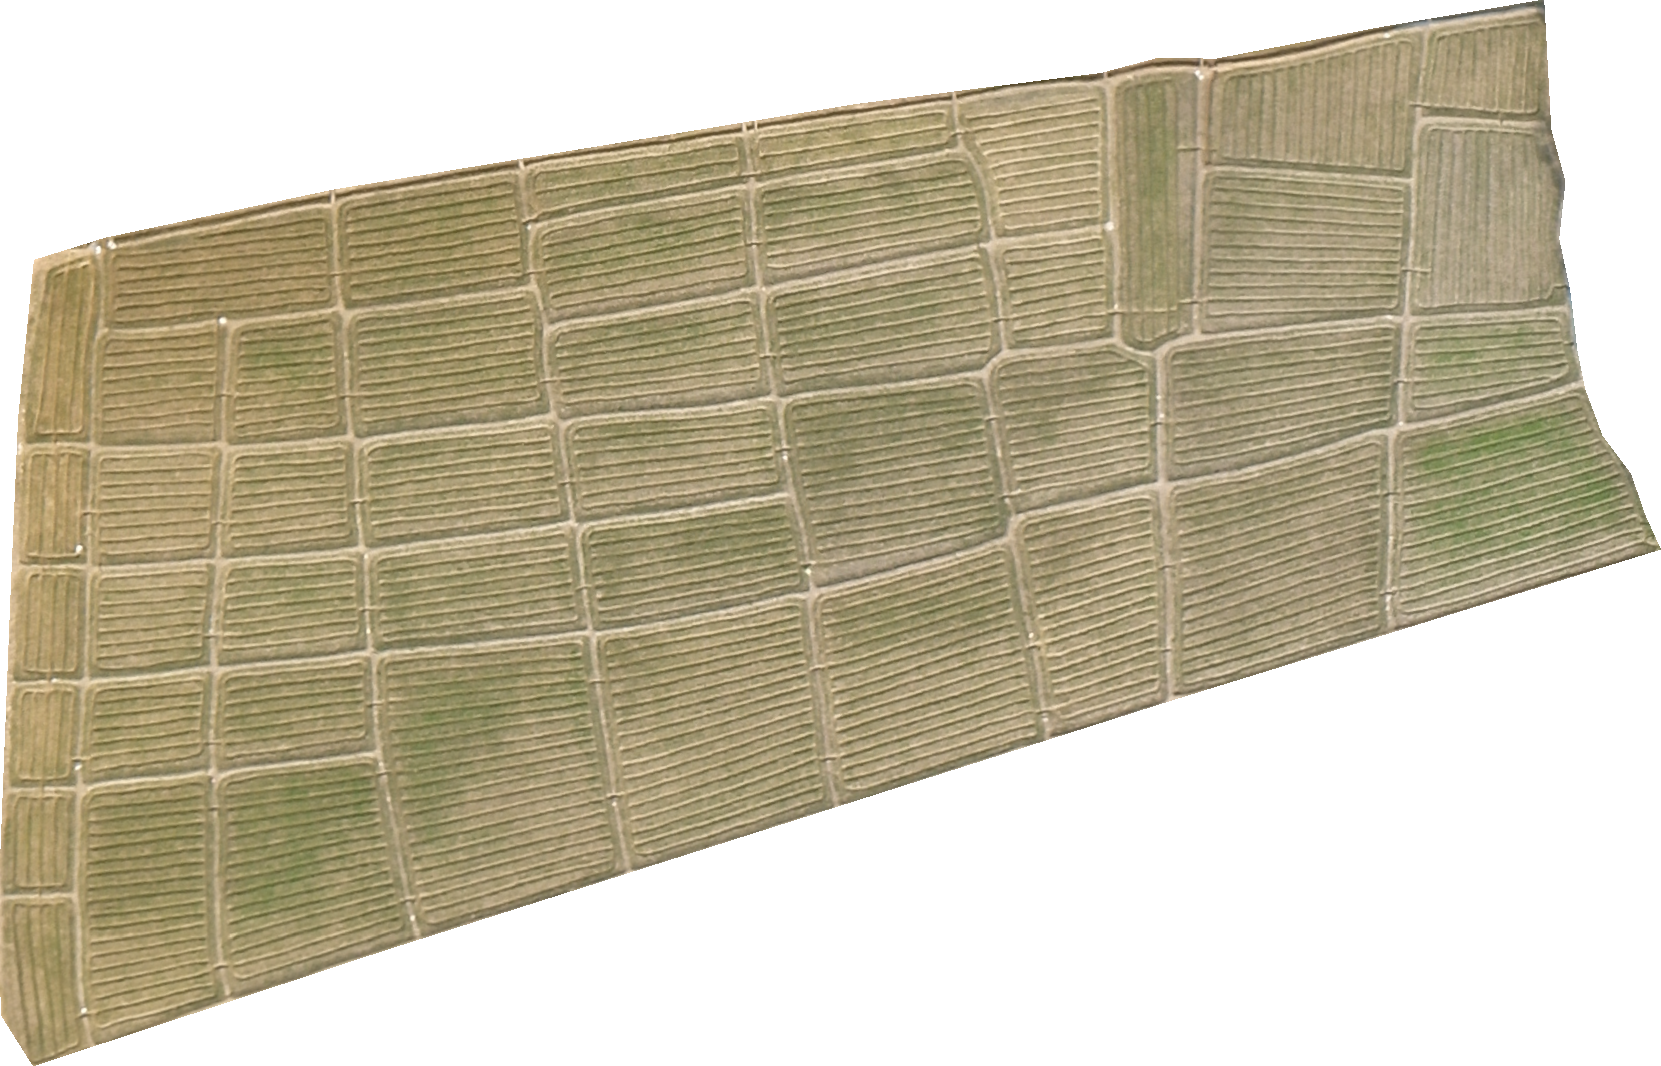

In [65]:
imrgb

In [ ]:
df = pd.DataFrame( columns= ["msp_red","msp_green","msp_NIR","msp_red_edge","red_rgb","green_rgb","blue_rgb"],index=["ID"] )

In [55]:
def mean_all_pix(fullpath):
    im = Image.open(fullpath)
    x = pd.DataFrame(np.array(im))
    mex = x[x != -10000].mean().mean()  
    return(mex)
    
def mean_all_pix_rgb(fullpath):
    im = Image.open(fullpath)
    a = np.array(im)
    r = a[:,:,0]
    g = a[:,:,1]
    b = a[:,:,2]
    return(r.mean(),g.mean(),b.mean())

In [56]:
root = r"C:\web\data\corn\20190106_แยกแปลง"
using_ID = [10002, 10005, 10007, 10008, 10010, 10015, 10023, 10029, 10033, 
            10038, 10040, 10046, 10047, 10049, 10060, 10061, 10063, 10067, 
            10073, 10081, 10098, 10105, 10108, 10109, 10110, 10112, 10121]
df_dict = {}
columns= ["red","green","NIR","red_edge","red_rgb","green_rgb","blue_rgb"]
   

for roots, dirs, files  in os.walk(root):
   mean_list = []
   rl = []
   gl = []
   bl = []
   for file in files:
      if file[-4:] == ".tif" :
         fullpath = os.path.join(roots,file)
         file_name = file[:-4].split("_")
         ID_crop = file_name[-1]
         VI = "_".join(file_name[1:-3] )
         if VI != "rgb":   
            if int(ID_crop) in using_ID:
               mex = mean_all_pix(fullpath) # วิธีที่ใช้หาค่าเฉลี่ย อันนี้ใช้  ทุก pixels
               mean_list.append(mex)
               
         else:
            if int(ID_crop) in using_ID:
               r_m ,g_m , b_m = mean_all_pix_rgb(fullpath)
               rl.append(r_m)
               gl.append(g_m)
               bl.append(b_m)
   if VI != "rgb":
      df_dict[VI] = mean_list
   else:
      df_dict["red_rgb"] = rl
      df_dict["green_rgb"] = gl
      df_dict["blue_rgb"] = bl
print(df_dict)


{'red_rgb': [63.55123069981645, 113.70069717402872, 73.69954784169181, 66.41670150164421, 96.30984589340706, 59.6313201435396, 52.621608145866055, 42.283816239686814, 101.6238053660118, 135.4111525852194, 79.8731504243781, 61.58072674837337, 86.45266430324516, 58.447863000148516, 92.23697139837476, 40.17303610236153, 90.9525759737449, 55.263726024453334, 51.04198537711015, 68.72811133773187, 89.88323907712326, 110.43031890052706, 96.93467500523694, 92.43866130055463, 139.99918530250238, 80.52720838017498, 97.47814021544438], 'green_rgb': [76.31722746155332, 112.32325404435487, 87.75677724312453, 74.68181511500676, 86.95808873705207, 63.25507566056194, 70.407779161901, 49.80990559320672, 93.53071851424299, 125.09468473094495, 76.98560145767544, 64.24749838333501, 83.99699966669696, 73.33982053844235, 85.86787017730826, 52.119723299993915, 88.57499558666564, 55.51201713114691, 60.711743113071456, 75.02498191469543, 96.0095690906361, 102.46617352725332, 92.12811598316068, 87.3766946735286

In [ ]:
dfasda = {'msp_green': [0.08016721, 0.08865585, 0.07547256, 0.07728728, 0.10195497, 0.08236774, 0.07806449, 0.07729178, 0.118119344, 0.12474694, 0.080974065, 0.0930686, 0.0990558, 0.084912814, 0.0898573, 0.066419095, 0.08211761, 0.10394994, 0.078879975, 0.08428412, 0.08663528, 0.097254656, 0.11398497, 0.09736815, 0.11161667, 0.07777928, 0.10213522], 'msp_nir': [0.41858944, 0.19371583, 0.31274277, 0.27255797, 0.23746212, 0.2679202, 0.49179032, 0.3804001, 0.22223185, 0.21320415, 0.23328583, 0.29174843, 0.25606278, 0.44730207, 0.22292356, 0.40622544, 0.23587036, 0.30637294, 0.38221842, 0.29900473, 0.2972085, 0.2642885, 0.28099945, 0.26034078, 0.25750527, 0.31818348, 0.32908434], 'msp_red': [0.048759043, 0.06952862, 0.0459051, 0.049910083, 0.104556285, 0.06582439, 0.041004438, 0.048062723, 0.10971701, 0.13054813, 0.07080368, 0.0661057, 0.07974344, 0.048902337, 0.08948909, 0.04024387, 0.07580296, 0.086887285, 0.048951074, 0.062096503, 0.0625796, 0.09489084, 0.09693592, 0.08807028, 0.12365287, 0.061194982, 0.09227011], 'msp_red_edge': [0.23845968, 0.13531958, 0.18360282, 0.17661951, 0.1597908, 0.168026, 0.25829083, 0.2390199, 0.17414753, 0.17274345, 0.14921114, 0.19568312, 0.18358779, 0.2986587, 0.1589823, 0.22684589, 0.14679755, 0.21670184, 0.22895475, 0.20092095, 0.18988225, 0.1946076, 0.19453917, 0.18323202, 0.1886509, 0.19562554, 0.21378842]}

In [57]:
dff = pd.DataFrame(df_dict,index=using_ID)

In [58]:
dff

,red_rgb,green_rgb,blue_rgb,msp_green,msp_nir,msp_red,msp_red_edge
10002,63.551231,76.317227,51.391189,0.080167,0.418589,0.048759,0.238460
10005,113.700697,112.323254,86.326303,0.088656,0.193716,0.069529,0.135320
10007,73.699548,87.756777,61.849493,0.075473,0.312743,0.045905,0.183603
10008,66.416702,74.681815,50.860358,0.077287,0.272558,0.049910,0.176620
10010,96.309846,86.958089,62.602215,0.101955,0.237462,0.104556,0.159791
10015,59.631320,63.255076,46.565749,0.082368,0.267920,0.065824,0.168026
10023,52.621608,70.407779,50.190558,0.078064,0.491790,0.041004,0.258291
10029,42.283816,49.809906,30.307848,0.077292,0.380400,0.048063,0.239020
10033,101.623805,93.530719,70.910594,0.118119,0.222232,0.109717,0.174148
10038,135.411153,125.094685,106.308174,0.124747,0.213204,0.130548,0.172743
